In [60]:
import json
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

from utils import *

base_map_dir = "data/base/map"
os.makedirs(base_map_dir, exist_ok=True)
base_json_dir = "data/base/json"
os.makedirs(base_json_dir, exist_ok=True)

base_map_empty_filepath = "data/base/json/base_map_empty.json"
base_map_filepath = "data/base/json/base_map.json"

DISPLAY_COLOR_DECAY_FACTOR=0.7

In [83]:
# FUNCTIONS TO DISPLAY MAP
# Implemented very similarly to the actual functions in Creator

def rand_color():
    return (random.random(), random.random(), random.random())

# Function to add a rectangle for a subitem
def add_rectangle(ax, name, coordinates, color='lightblue', linewidth=1, edgecolor='blue'):
    x1, y1, x2, y2 = coordinates
    width = x2 - x1
    height = y2 - y1
    rect = patches.Rectangle((x1, y1), width, height, linewidth=linewidth, edgecolor=edgecolor, facecolor=color, label=name)
    ax.add_patch(rect)
    ax.text(x1 + width / 2, y1 + height / 2, name, ha='center', va='center', fontsize=12, color='darkblue')

# Recursively adds rectangles for all children
# Exponentially changes colors of children from yellow to green
def draw(ax, item_json, color=(1,1,0), base=False, recursive=True):            
    if not 'coordinates' in item_json:
        return
    
    if base:
        add_rectangle(ax, "", item_json['coordinates'], color=(1,1,1), linewidth=3)
    else:
        add_rectangle(ax, item_json['name'], item_json['coordinates'], color=color)
        color = (color[0]*DISPLAY_COLOR_DECAY_FACTOR, color[1], color[2])
    
    if not 'children' in item_json or (not recursive and not base):
        return
    
    for subitem in item_json['children']:
        if 'name' in subitem:
            draw(ax, subitem, color=color, recursive=recursive)


# Given a json (dict) of a map, displays all children recursively using MatPlotLib
def display_map(map_json, name="test", recursive=True, save=False, figsize=(45,30)):
    # Create the plot
    fig, ax = plt.subplots(figsize=figsize)
    
    # Recursively plots all children
    draw(ax, map_json, base=True, recursive=recursive)

    # Set plot limits and labels
    assert map_json['coordinates']
    coordinates = map_json['coordinates']
    #ax.set_xlim(-50, 50)
    #ax.set_ylim(-25, 25)
    ax.set_xlim(map_json['coordinates'][0], map_json['coordinates'][2])
    ax.set_ylim(map_json['coordinates'][1], map_json['coordinates'][3])
    ax.set_xlabel("X Coordinate")
    ax.set_ylabel("Y Coordinate")
    ax.set_title(map_json['name'] + " Layout")

    # Show grid and plot
    ax.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')

    if save:    
        plt.savefig(f"data/creator_maps/{name}.png")
        with open(f"data/creator_jsons/{name}.json", 'w') as f:
            json.dump(map_json, f, indent=4)
    
    plt.show()


# Given a json (dict) of a map, displays only top level children
def display_top(map_json, name="top-level-test", save=False):
    display_map(map_json, name=name, recursive=False, save=save)

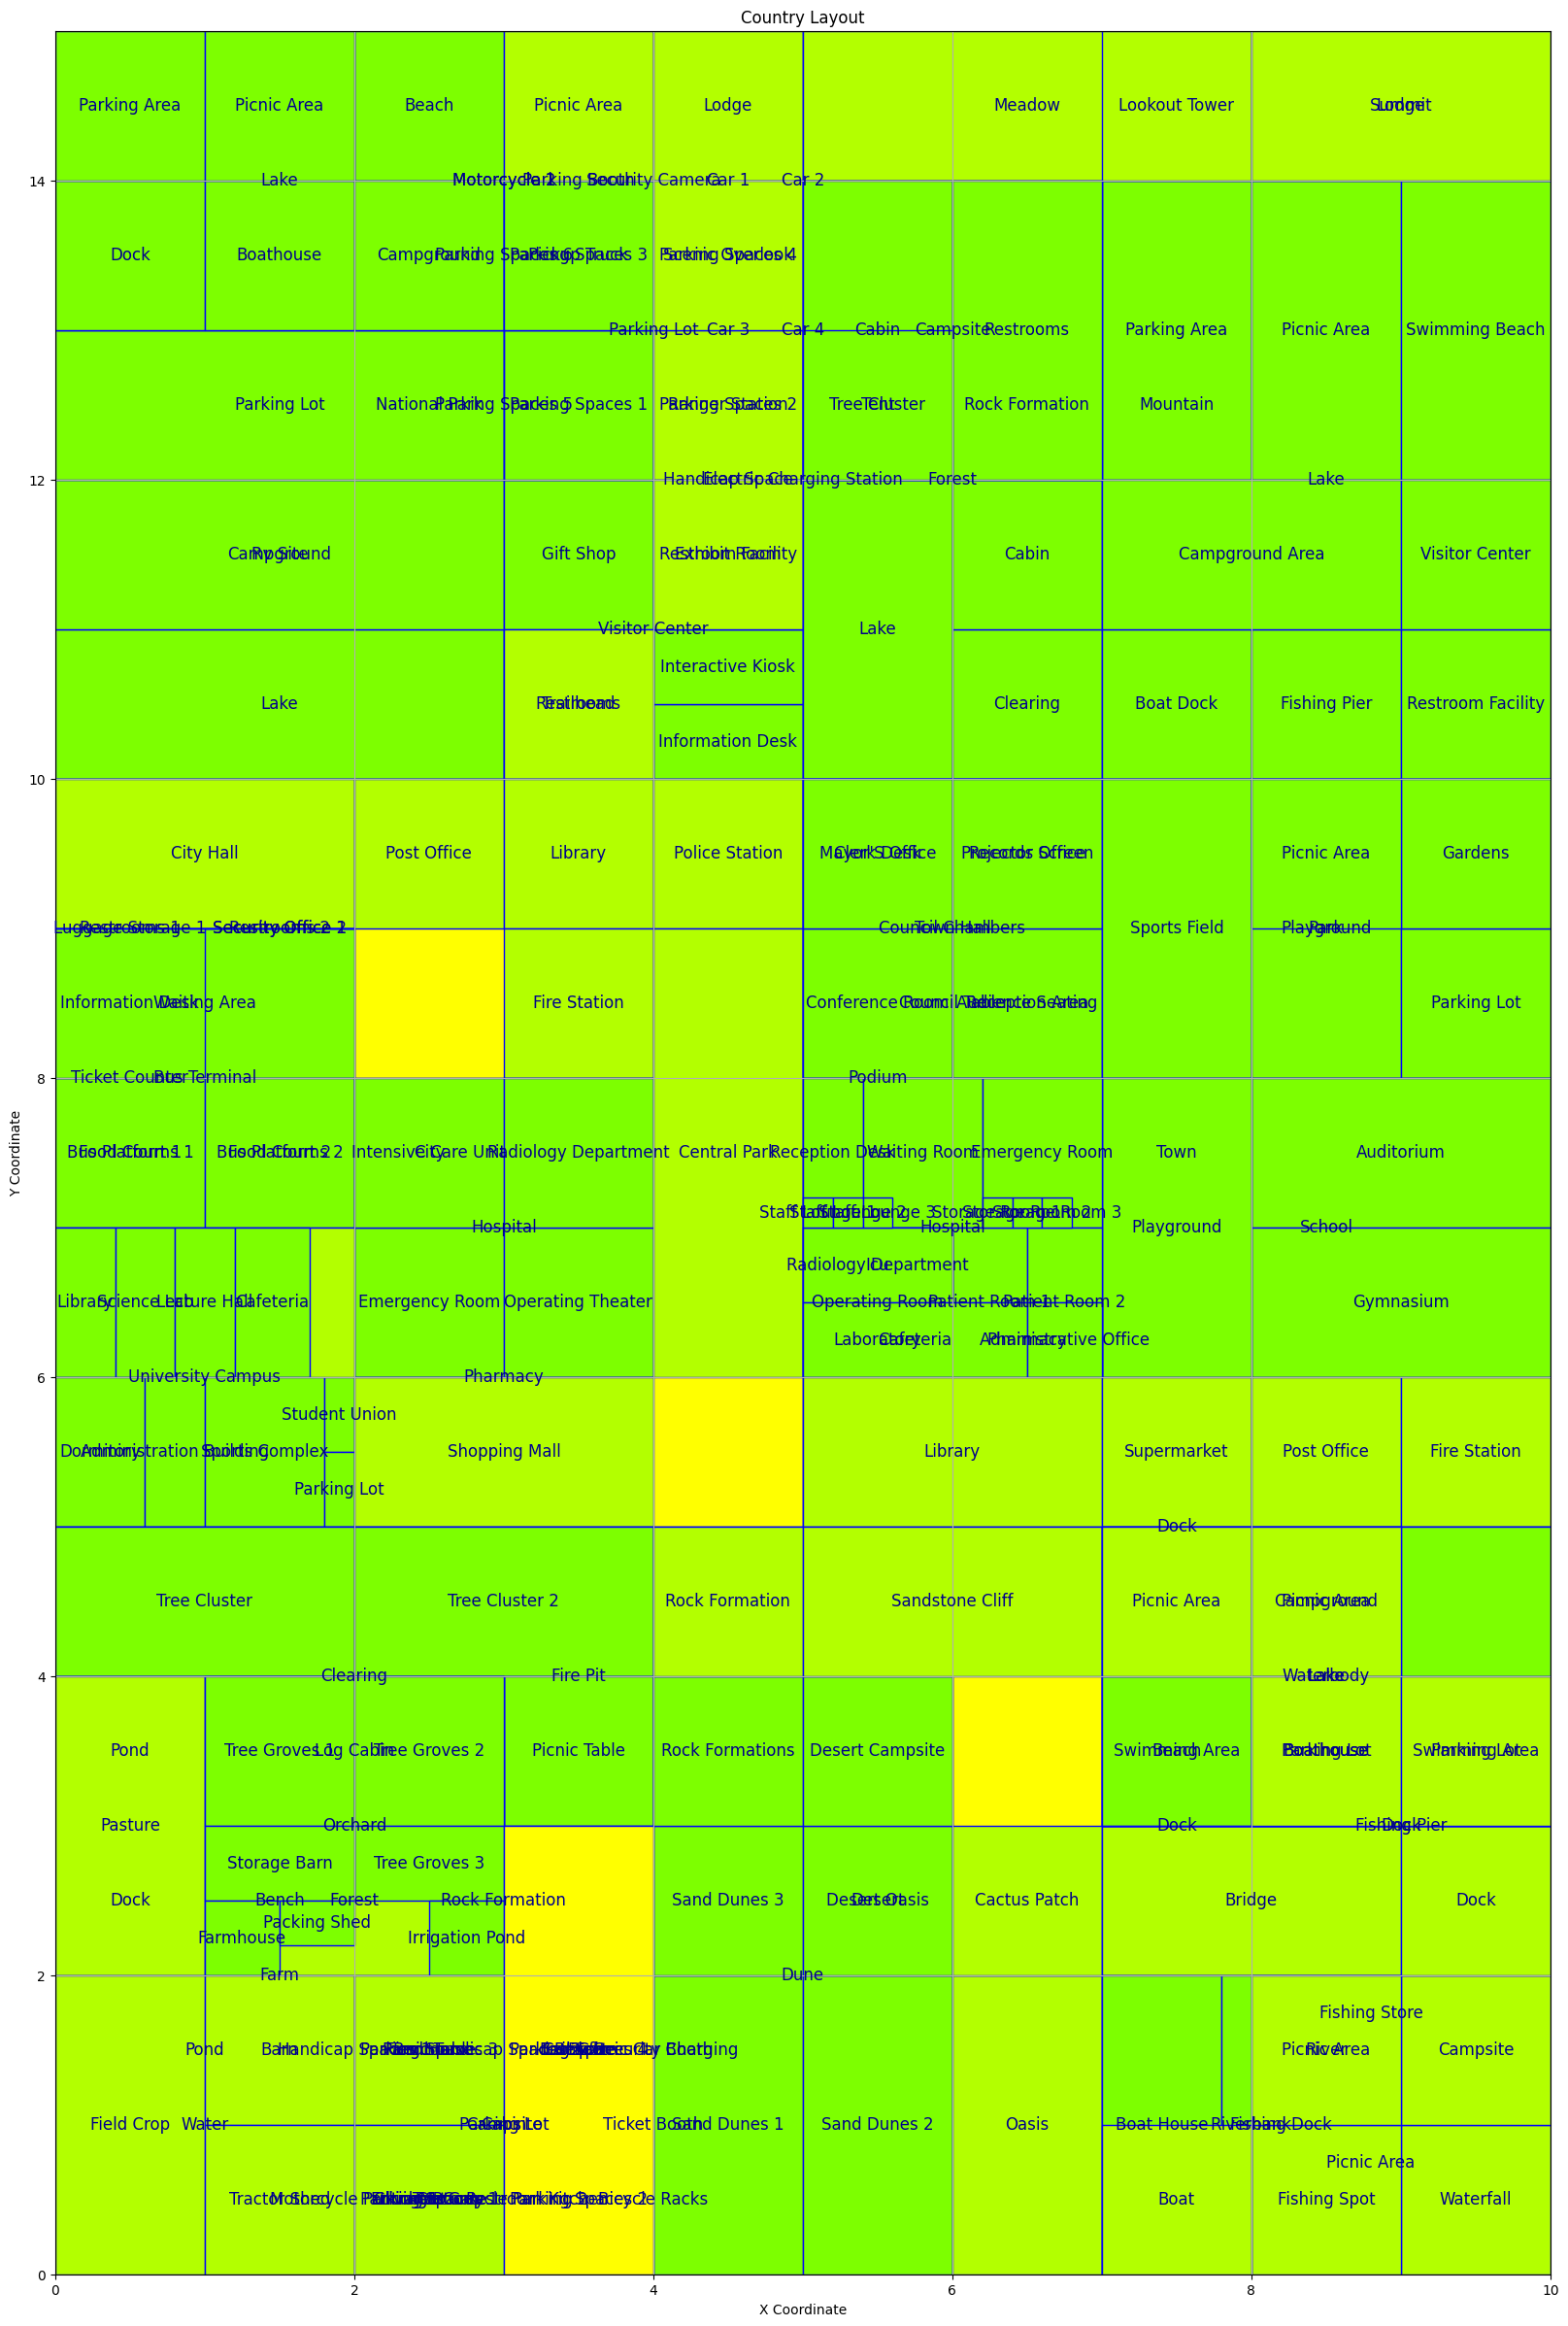

In [84]:
m_json = ""

with open("data/creator_jsons/final_map_country1_country.json") as f:
    m_json = json.load(f)

display_map(m_json, save=True, figsize=(45, 30))




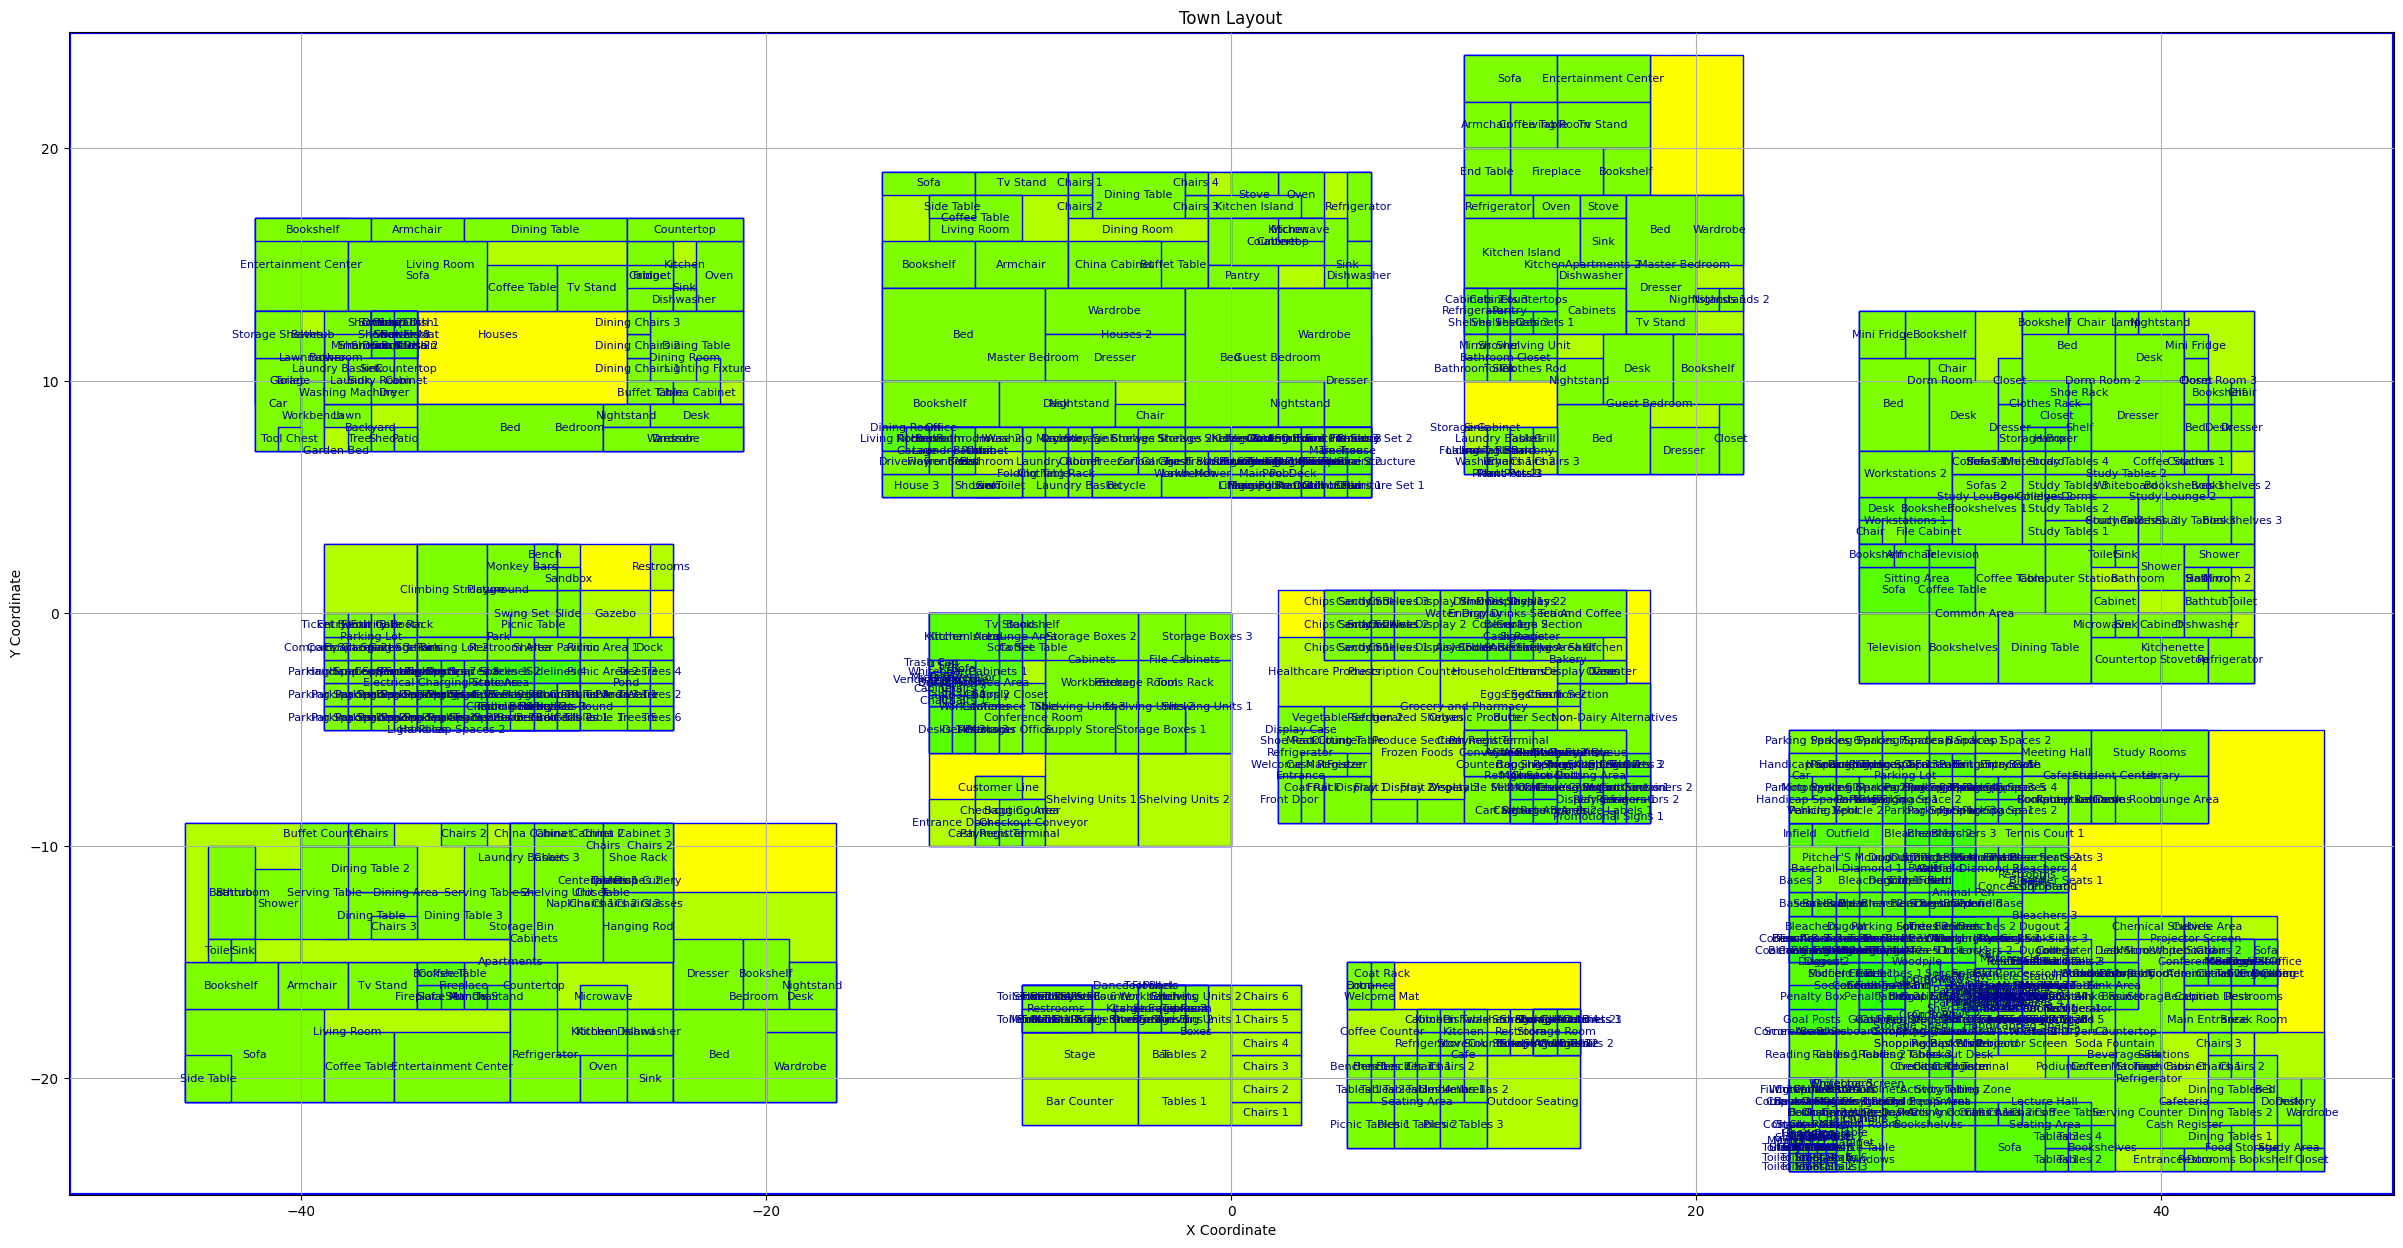

In [56]:
base_map_json = ""

with open(base_map_filepath) as f:
    base_map_json = json.load(f)

display_map(base_map_json, save=True)


In [ ]:
apartments_json = {
    "name": "Apartments",
    "coordinates": [
        -45,
        -21,
        -17,
        -9
    ],
    "children": [
        {
            "name": "Living Room",
            "coordinates": [
                -45,
                -21,
                -31,
                -15
            ],
            "children": [
                {
                    "name": "Sofa",
                    "coordinates": [
                        -45,
                        -21,
                        -39,
                        -17
                    ]
                },
                {
                    "name": "Coffee Table",
                    "coordinates": [
                        -39,
                        -21,
                        -36,
                        -18
                    ]
                },
                {
                    "name": "Entertainment Center",
                    "coordinates": [
                        -36,
                        -21,
                        -31,
                        -18
                    ]
                },
                {
                    "name": "Bookshelf",
                    "coordinates": [
                        -45,
                        -17,
                        -41,
                        -15
                    ]
                },
                {
                    "name": "Armchair",
                    "coordinates": [
                        -41,
                        -17,
                        -38,
                        -15
                    ]
                },
                {
                    "name": "Tv Stand",
                    "coordinates": [
                        -38,
                        -17,
                        -35,
                        -15
                    ]
                },
                {
                    "name": "Fireplace",
                    "coordinates": [
                        -35,
                        -17,
                        -31,
                        -15
                    ],
                    "children": [
                        {
                            "name": "Sofa Set",
                            "coordinates": [
                                -35,
                                -17,
                                -33,
                                -16
                            ]
                        },
                        {
                            "name": "Armchair",
                            "coordinates": [
                                -33,
                                -17,
                                -32,
                                -16
                            ]
                        },
                        {
                            "name": "Coffee Table",
                            "coordinates": [
                                -34,
                                -16,
                                -33,
                                -15
                            ]
                        },
                        {
                            "name": "Tv Stand",
                            "coordinates": [
                                -32,
                                -17,
                                -31,
                                -16
                            ]
                        },
                        {
                            "name": "Fireplace Mantle",
                            "coordinates": [
                                -34,
                                -17,
                                -34,
                                -16
                            ]
                        },
                        {
                            "name": "Bookshelf",
                            "coordinates": [
                                -35,
                                -16,
                                -33,
                                -15
                            ]
                        }
                    ]
                },
                {
                    "name": "Side Table",
                    "coordinates": [
                        -45,
                        -21,
                        -43,
                        -19
                    ]
                }
            ]
        },
        {
            "name": "Kitchen",
            "coordinates": [
                -31,
                -21,
                -24,
                -15
            ],
            "children": [
                {
                    "name": "Refrigerator",
                    "coordinates": [
                        -31,
                        -21,
                        -28,
                        -17
                    ]
                },
                {
                    "name": "Oven",
                    "coordinates": [
                        -28,
                        -21,
                        -26,
                        -18
                    ]
                },
                {
                    "name": "Sink",
                    "coordinates": [
                        -26,
                        -21,
                        -24,
                        -19
                    ]
                },
                {
                    "name": "Kitchen Island",
                    "coordinates": [
                        -29,
                        -19,
                        -24,
                        -17
                    ]
                },
                {
                    "name": "Countertop",
                    "coordinates": [
                        -31,
                        -17,
                        -29,
                        -15
                    ]
                },
                {
                    "name": "Cabinets",
                    "coordinates": [
                        -31,
                        -15,
                        -29,
                        -13
                    ]
                },
                {
                    "name": "Dishwasher",
                    "coordinates": [
                        -26,
                        -19,
                        -24,
                        -17
                    ]
                },
                {
                    "name": "Table",
                    "coordinates": [
                        -29,
                        -13,
                        -24,
                        -11
                    ],
                    "children": [
                        {
                            "name": "Tabletop",
                            "coordinates": [
                                -29,
                                -12,
                                -24,
                                -11
                            ]
                        },
                        {
                            "name": "Chairs 1",
                            "coordinates": [
                                -28,
                                -13,
                                -27,
                                -12
                            ]
                        },
                        {
                            "name": "Chairs 2",
                            "coordinates": [
                                -27,
                                -13,
                                -26,
                                -12
                            ]
                        },
                        {
                            "name": "Chairs 3",
                            "coordinates": [
                                -26,
                                -13,
                                -25,
                                -12
                            ]
                        },
                        {
                            "name": "Centerpiece",
                            "coordinates": [
                                -28,
                                -12,
                                -27,
                                -11
                            ]
                        },
                        {
                            "name": "Dishes 1",
                            "coordinates": [
                                -27,
                                -12,
                                -26,
                                -11
                            ]
                        },
                        {
                            "name": "Dishes 2",
                            "coordinates": [
                                -26,
                                -12,
                                -25,
                                -11
                            ]
                        },
                        {
                            "name": "Cutlery",
                            "coordinates": [
                                -25,
                                -12,
                                -24,
                                -11
                            ]
                        },
                        {
                            "name": "Glasses",
                            "coordinates": [
                                -25,
                                -13,
                                -24,
                                -12
                            ]
                        },
                        {
                            "name": "Napkins",
                            "coordinates": [
                                -29,
                                -13,
                                -28,
                                -12
                            ]
                        }
                    ]
                },
                {
                    "name": "Chairs",
                    "coordinates": [
                        -28,
                        -11,
                        -26,
                        -9
                    ]
                },
                {
                    "name": "Chairs 2",
                    "coordinates": [
                        -26,
                        -11,
                        -24,
                        -9
                    ]
                },
                {
                    "name": "Chairs 3",
                    "coordinates": [
                        -30,
                        -11,
                        -28,
                        -10
                    ]
                },
                {
                    "name": "Microwave",
                    "coordinates": [
                        -28,
                        -17,
                        -26,
                        -16
                    ]
                }
            ]
        },
        {
            "name": "Bedroom",
            "coordinates": [
                -24,
                -21,
                -17,
                -12
            ],
            "children": [
                {
                    "name": "Bed",
                    "coordinates": [
                        -24,
                        -21,
                        -20,
                        -17
                    ]
                },
                {
                    "name": "Wardrobe",
                    "coordinates": [
                        -20,
                        -21,
                        -17,
                        -18
                    ]
                },
                {
                    "name": "Desk",
                    "coordinates": [
                        -20,
                        -18,
                        -17,
                        -15
                    ]
                },
                {
                    "name": "Dresser",
                    "coordinates": [
                        -24,
                        -17,
                        -21,
                        -14
                    ]
                },
                {
                    "name": "Bookshelf",
                    "coordinates": [
                        -21,
                        -17,
                        -19,
                        -14
                    ]
                },
                {
                    "name": "Nightstand",
                    "coordinates": [
                        -19,
                        -17,
                        -17,
                        -15
                    ]
                }
            ]
        },
        {
            "name": "Bathroom",
            "coordinates": [
                -45,
                -15,
                -40,
                -9
            ],
            "children": [
                {
                    "name": "Bathtub",
                    "coordinates": [
                        -44,
                        -14,
                        -42,
                        -10
                    ]
                },
                {
                    "name": "Shower",
                    "coordinates": [
                        -42,
                        -14,
                        -40,
                        -11
                    ]
                },
                {
                    "name": "Toilet",
                    "coordinates": [
                        -44,
                        -15,
                        -43,
                        -14
                    ]
                },
                {
                    "name": "Sink",
                    "coordinates": [
                        -43,
                        -15,
                        -42,
                        -14
                    ]
                }
            ]
        },
        {
            "name": "Dining Area",
            "coordinates": [
                -40,
                -15,
                -31,
                -9
            ],
            "children": [
                {
                    "name": "Dining Table",
                    "coordinates": [
                        -39,
                        -14,
                        -35,
                        -12
                    ]
                },
                {
                    "name": "Dining Table 2",
                    "coordinates": [
                        -39,
                        -12,
                        -35,
                        -10
                    ]
                },
                {
                    "name": "Dining Table 3",
                    "coordinates": [
                        -35,
                        -14,
                        -31,
                        -12
                    ]
                },
                {
                    "name": "Chairs",
                    "coordinates": [
                        -38,
                        -10,
                        -36,
                        -9
                    ]
                },
                {
                    "name": "Chairs 2",
                    "coordinates": [
                        -34,
                        -10,
                        -32,
                        -9
                    ]
                },
                {
                    "name": "Chairs 3",
                    "coordinates": [
                        -37,
                        -14,
                        -35,
                        -13
                    ]
                },
                {
                    "name": "Serving Table",
                    "coordinates": [
                        -40,
                        -14,
                        -38,
                        -10
                    ]
                },
                {
                    "name": "Serving Table 2",
                    "coordinates": [
                        -33,
                        -14,
                        -31,
                        -10
                    ]
                },
                {
                    "name": "Buffet Counter",
                    "coordinates": [
                        -40,
                        -10,
                        -38,
                        -9
                    ]
                },
                {
                    "name": "China Cabinet",
                    "coordinates": [
                        -31,
                        -9,
                        -29,
                        -10
                    ]
                },
                {
                    "name": "China Cabinet 2",
                    "coordinates": [
                        -29,
                        -9,
                        -27,
                        -10
                    ]
                },
                {
                    "name": "China Cabinet 3",
                    "coordinates": [
                        -27,
                        -9,
                        -25,
                        -10
                    ]
                }
            ]
        },
        {
            "name": "Closet",
            "coordinates": [
                -31,
                -15,
                -24,
                -9
            ],
            "children": [
                {
                    "name": "Shelving Unit",
                    "coordinates": [
                        -31,
                        -15,
                        -27,
                        -9
                    ]
                },
                {
                    "name": "Hanging Rod",
                    "coordinates": [
                        -27,
                        -15,
                        -24,
                        -12
                    ]
                },
                {
                    "name": "Shoe Rack",
                    "coordinates": [
                        -27,
                        -12,
                        -24,
                        -9
                    ]
                },
                {
                    "name": "Storage Bin",
                    "coordinates": [
                        -31,
                        -15,
                        -30,
                        -12
                    ]
                },
                {
                    "name": "Laundry Basket",
                    "coordinates": [
                        -31,
                        -12,
                        -30,
                        -9
                    ]
                }
            ]
        }
    ]
}

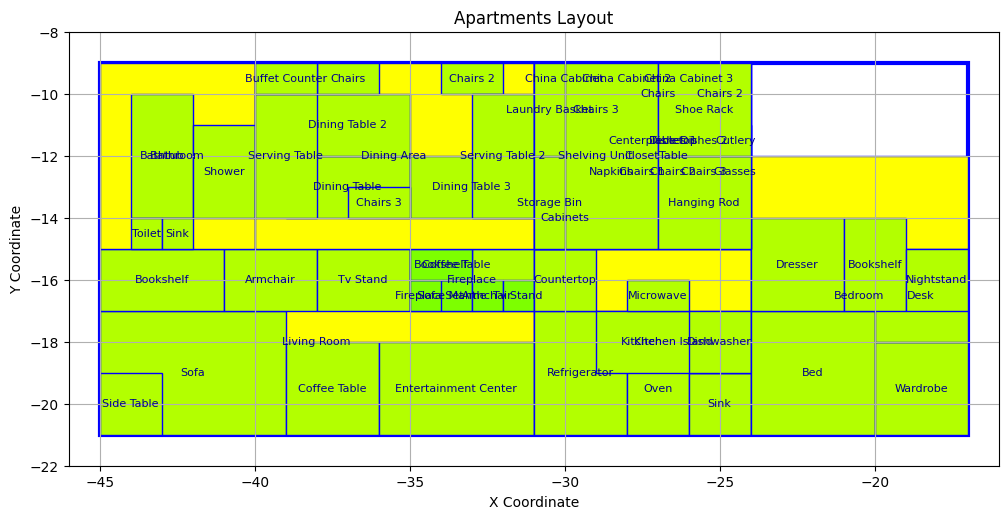

In [ ]:
display_map(apartments_json, name="apartments", save=True)